한글 인코딩관련알아둘 것
EUC-KR, CP949, UTF-8(유니코드 8비트. 한글 1글자에 3바이트), UTF-16 

In [3]:
from matplotlib import font_manager, rc     # 한글이 깨져나오면 이 셀을 위에 집어넣는다.
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False # - 한글/기호 깨지는것 방지
#f_path = "/Library/Fonts/AppleGothic.ttf" (맥os)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

## 서울시 청소년들의 스트레스 데이터

In [4]:
import pandas as pd
pd.read_excel('../data/teenage_mental.xls')     

#xlrd가 없다는 에러뜨면 anaconda prompt 관리자권한 실행하여 pip install xlrd 하여 파이썬 패키지를 설치한다.

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [5]:
pd.read_excel('../data/teenage_mental.xls', header = 1, usecols='C:K')  #header=행, usecols=C:K 는 3열~11열

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [6]:
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울감경험률', '우울남학생', 
             '우울여학생', '자살생각율', '자살남학생', '자살여학생']

raw_data = pd.read_excel('../data/teenage_mental.xls', header = 1, usecols='C:K', names = col_names)

raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [7]:
raw_data.loc[1] = 100 - raw_data.loc[0]   #2번째 행에 역을 구함. 스트레스받지않는학생, 우울하지 않은학생, ...
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [8]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [9]:
raw_data.set_index('응답', drop=True, inplace = True)    #index의 디폴트가 순서가 아니라 응답이 되었다. 
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


<Axes: ylabel='스트레스'>

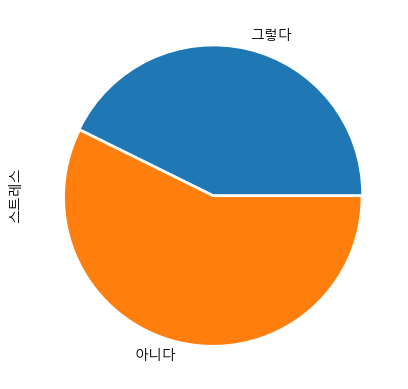

In [10]:
raw_data['스트레스'].plot.pie(explode = [0,0.02])

<li>matplotlib.pyplot.subplots는 figure와 axes 오브젝트를 반환하는데 f,ax로 받으면 figure와 axes의 속성을 하나하나 지정할 수 있습니다. 
<li>subplot로 3개이므로 ax[0], ax[1], ax[2] 까지 각각 속성을 지정할 수 있습니다. 

Text(0, 0.5, '')

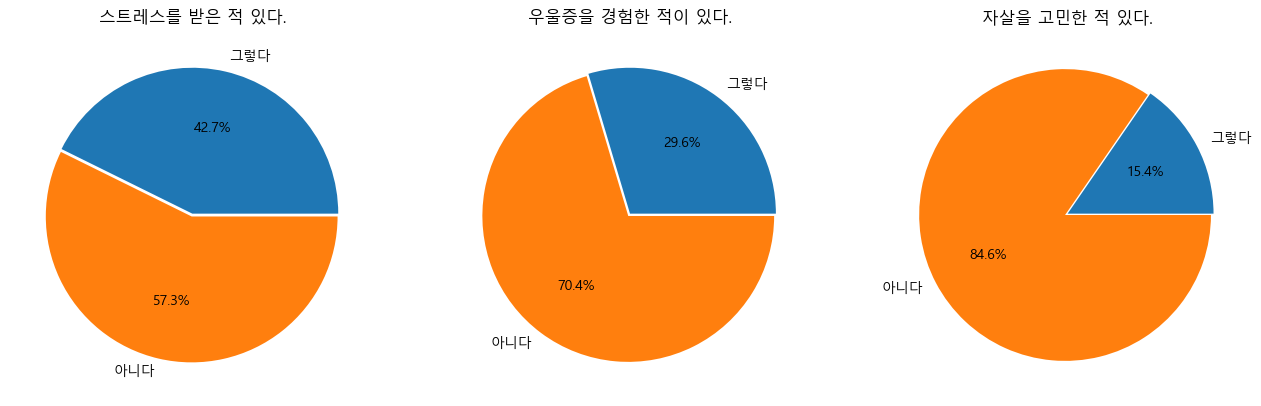

In [11]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 3, figsize = (16, 8))

raw_data['스트레스'].plot.pie(explode=[0,0.02], ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('스트레스를 받은 적 있다.')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0,0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('우울증을 경험한 적이 있다.')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0,0.02], ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('자살을 고민한 적 있다.')
ax[2].set_ylabel('')


## 연습문제
### 서울시 하고 싶은 여가활동 통계, 
### 연령별 여가활동 통계를 파이 챠트로 그려보세요. (seoul.xls)

In [12]:
raw_data = pd.read_excel('../data/python_data/seoul.xls')     

In [13]:
raw_data

,기간,대분류,분류,합계,TV 또는 비디오시청,여행야외나들이,컴퓨터게임인터넷검색 등,휴식,사회활동,운동,문화예술관람,창작적 취미활동,운동경기관람,종교활동,기타
0,2016,서울시,서울시,100,43.0,13.2,6.9,6.5,1.2,6.1,7.5,4.0,2.9,8.5,0.1
1,2016,성별,남자,100,43.7,13.1,7.6,6.0,0.7,8.5,6.6,3.5,3.5,6.5,0.1
2,2016,성별,여자,100,42.4,13.2,6.3,7.0,1.6,3.8,8.5,4.5,2.2,10.4,0.1
3,2016,연령별,10대,100,52.5,12.8,2.1,5.6,1.0,7.9,3.0,2.6,2.6,9.9,0
4,2016,연령별,20대,100,50.1,15.1,3.5,5.3,1.3,7.2,3.1,2.5,2.4,9.4,0.1
5,2016,연령별,30대,100,42.4,15.6,5.3,5.3,1.9,7.6,6.2,4.4,2.8,8.4,0.1
6,2016,연령별,40대,100,38.3,16.0,9.8,6.7,1.4,5.2,6.3,5.2,3.5,7.6,0.1
7,2016,연령별,50대,100,44.7,10.7,8.6,7.8,0.8,4.3,7.4,3.1,2.5,10.1,0.1
8,2016,연령별,60대 이상,100,38.6,9.5,8.3,7.4,0.8,5.8,14.3,5.0,3.1,7.1,0.1
9,2016,학력별,중졸 이하,100,39.3,9.9,7.8,8.1,1.0,5.3,13.9,4.9,2.7,7.2,0


In [15]:
df = raw_data['대분류']=='연령별'
setting = raw_data.loc[df]

In [16]:
setting

,기간,대분류,분류,합계,TV 또는 비디오시청,여행야외나들이,컴퓨터게임인터넷검색 등,휴식,사회활동,운동,문화예술관람,창작적 취미활동,운동경기관람,종교활동,기타
3,2016,연령별,10대,100,52.5,12.8,2.1,5.6,1.0,7.9,3.0,2.6,2.6,9.9,0
4,2016,연령별,20대,100,50.1,15.1,3.5,5.3,1.3,7.2,3.1,2.5,2.4,9.4,0.1
5,2016,연령별,30대,100,42.4,15.6,5.3,5.3,1.9,7.6,6.2,4.4,2.8,8.4,0.1
6,2016,연령별,40대,100,38.3,16.0,9.8,6.7,1.4,5.2,6.3,5.2,3.5,7.6,0.1
7,2016,연령별,50대,100,44.7,10.7,8.6,7.8,0.8,4.3,7.4,3.1,2.5,10.1,0.1
8,2016,연령별,60대 이상,100,38.6,9.5,8.3,7.4,0.8,5.8,14.3,5.0,3.1,7.1,0.1


In [17]:
rows = setting.loc[:,'분류']

In [18]:
rows

3       10대
4       20대
5       30대
6       40대
7       50대
8    60대 이상
Name: 분류, dtype: object

In [19]:
setting['운동']

3    7.9
4    7.2
5    7.6
6    5.2
7    4.3
8    5.8
Name: 운동, dtype: float64

Text(0, 0.5, '')

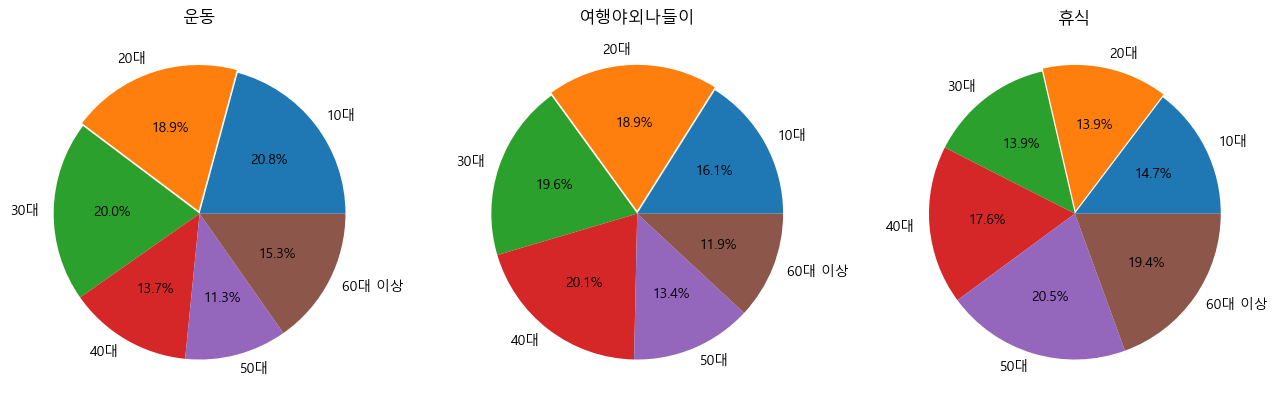

In [20]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 3, figsize = (16, 8))
rows = setting.loc[:,'분류']
labels = rows

setting['운동'].plot.pie(explode=[0,0.02,0,0,0,0], ax = ax[0], labels = labels, autopct = '%1.1f%%')
ax[0].set_title('운동')
ax[0].set_ylabel('')

setting['여행야외나들이'].plot.pie(explode=[0,0.02,0,0,0,0], ax = ax[1], labels = labels,autopct = '%1.1f%%')
ax[1].set_title('여행야외나들이')
ax[1].set_ylabel('')

setting['휴식'].plot.pie(explode=[0,0.02,0,0,0,0], ax = ax[2], labels = labels, autopct = '%1.1f%%')
ax[2].set_title('휴식')
ax[2].set_ylabel('')


In [21]:
setting.loc[:,'분류']

3       10대
4       20대
5       30대
6       40대
7       50대
8    60대 이상
Name: 분류, dtype: object

In [22]:
searchSeries = raw_data['대분류']

result = searchSeries.str.endswith('구')
gu_data = raw_data.loc[result]
gu_data.set_index(gu_data['분류'], inplace=True)
gu_data

,기간,대분류,분류,합계,TV 또는 비디오시청,여행야외나들이,컴퓨터게임인터넷검색 등,휴식,사회활동,운동,문화예술관람,창작적 취미활동,운동경기관람,종교활동,기타
분류,,,,,,,,,,,,,,,
종로구,2016,종로구,종로구,100,52.4,10.0,5.9,6.8,0.8,6.5,5.2,2.6,0.8,9.1,-
중구,2016,중구,중구,100,44.8,12.8,7.9,7.4,0.8,4.6,9.7,3.5,2.3,6.3,-
용산구,2016,용산구,용산구,100,46.2,11.7,6.0,6.3,0.5,8.3,6.7,4.0,4.6,5.6,0.1
성동구,2016,성동구,성동구,100,45.7,10.5,7.7,4.8,0.6,5.4,6.5,6.0,5.1,7.8,-
광진구,2016,광진구,광진구,100,46.4,12.9,6.4,5.6,0.4,7.2,3.8,4.1,4.0,9.1,-
동대문구,2016,동대문구,동대문구,100,44.3,10.1,11.2,7.1,0.9,6.2,5.6,4.4,2.1,7.9,0.3
중랑구,2016,중랑구,중랑구,100,35.8,17.2,6.6,6.4,1.6,7.0,8.1,4.4,3.9,8.9,0.1
성북구,2016,성북구,성북구,100,38.5,13.3,8.6,8.9,0.7,7.4,8.6,4.2,2.1,7.5,0.1
강북구,2016,강북구,강북구,100,36.4,14.3,5.5,6.4,1.1,9.4,10.8,1.9,5.0,8.8,0.2


In [23]:
gu_data

,기간,대분류,분류,합계,TV 또는 비디오시청,여행야외나들이,컴퓨터게임인터넷검색 등,휴식,사회활동,운동,문화예술관람,창작적 취미활동,운동경기관람,종교활동,기타
분류,,,,,,,,,,,,,,,
종로구,2016,종로구,종로구,100,52.4,10.0,5.9,6.8,0.8,6.5,5.2,2.6,0.8,9.1,-
중구,2016,중구,중구,100,44.8,12.8,7.9,7.4,0.8,4.6,9.7,3.5,2.3,6.3,-
용산구,2016,용산구,용산구,100,46.2,11.7,6.0,6.3,0.5,8.3,6.7,4.0,4.6,5.6,0.1
성동구,2016,성동구,성동구,100,45.7,10.5,7.7,4.8,0.6,5.4,6.5,6.0,5.1,7.8,-
광진구,2016,광진구,광진구,100,46.4,12.9,6.4,5.6,0.4,7.2,3.8,4.1,4.0,9.1,-
동대문구,2016,동대문구,동대문구,100,44.3,10.1,11.2,7.1,0.9,6.2,5.6,4.4,2.1,7.9,0.3
중랑구,2016,중랑구,중랑구,100,35.8,17.2,6.6,6.4,1.6,7.0,8.1,4.4,3.9,8.9,0.1
성북구,2016,성북구,성북구,100,38.5,13.3,8.6,8.9,0.7,7.4,8.6,4.2,2.1,7.5,0.1
강북구,2016,강북구,강북구,100,36.4,14.3,5.5,6.4,1.1,9.4,10.8,1.9,5.0,8.8,0.2


In [24]:
gu_data['분류']

분류
종로구      종로구
중구        중구
용산구      용산구
성동구      성동구
광진구      광진구
동대문구    동대문구
중랑구      중랑구
성북구      성북구
강북구      강북구
도봉구      도봉구
노원구      노원구
은평구      은평구
서대문구    서대문구
마포구      마포구
양천구      양천구
강서구      강서구
구로구      구로구
금천구      금천구
영등포구    영등포구
동작구      동작구
관악구      관악구
서초구      서초구
강남구      강남구
송파구      송파구
강동구      강동구
Name: 분류, dtype: object

In [25]:
pd.DataFrame(gu_data['여행야외나들이'].sort_values().head()).columns

Index(['여행야외나들이'], dtype='object')

Text(0, 0.5, '')

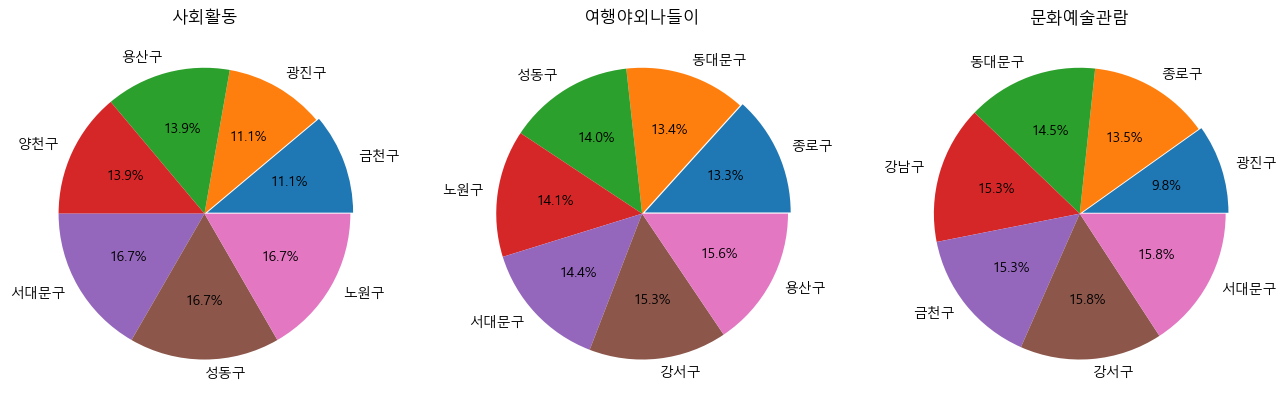

In [26]:
f, ax = plt.subplots(1, 3, figsize = (16, 8))
society = pd.DataFrame(gu_data['여행야외나들이'].sort_values().head())

#사회활동을 많이 하는 상위 7개의 구
gu_data['사회활동'].sort_values().head(7).plot.pie(explode=[0.02,0,0,0,0,0,0], ax = ax[0],autopct = '%1.1f%%')   
ax[0].set_title('사회활동')
ax[0].set_ylabel('')

#여행야외나들이을 많이 하는 상위 7개의 구
gu_data['여행야외나들이'].sort_values().head(7).plot.pie(explode=[0.02,0,0,0,0,0,0], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('여행야외나들이')
ax[1].set_ylabel('')

#문화예술관람을 많이 하는 상위 7개의 구
gu_data['문화예술관람'].sort_values().head(7).plot.pie(explode=[0.02,0,0,0,0,0,0], ax = ax[2], autopct = '%1.1f%%')
ax[2].set_title('문화예술관람')
ax[2].set_ylabel('')

#구의 지역gdp 고려해서 데이터분석하면 재미있을듯